<a href="https://colab.research.google.com/github/mdsiam135/thesis_2025/blob/main/DT_3labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/UpdatedDataset/data1.csv")


In [ ]:
# Binning the target into 3 classes: Low, Medium, High
df['Production_Class'] = pd.qcut(df['Production (M.Ton)'], q=3, labels=['Low', 'Medium', 'High'])

In [ ]:
# Encode categorical features
label_encoders = {}
for col in ['Crop', 'District']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Features and target
X = df.drop(columns=['Production (M.Ton)', 'Production_Class'])
y = df['Production_Class']

In [ ]:
# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Second split: 15% validation, 15% test from the 30%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)


In [ ]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Validation Evaluation
y_val_pred = clf.predict(X_val)
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
val_macro_f1 = f1_score(y_val, y_val_pred, average='macro')
print(f"Validation Macro F1 Score: {val_macro_f1:.4f}\n")


Validation Classification Report:
               precision    recall  f1-score   support

        High       0.88      0.88      0.88       282
         Low       0.92      0.92      0.92       281
      Medium       0.81      0.81      0.81       282

    accuracy                           0.87       845
   macro avg       0.87      0.87      0.87       845
weighted avg       0.87      0.87      0.87       845

Validation Macro F1 Score: 0.8700



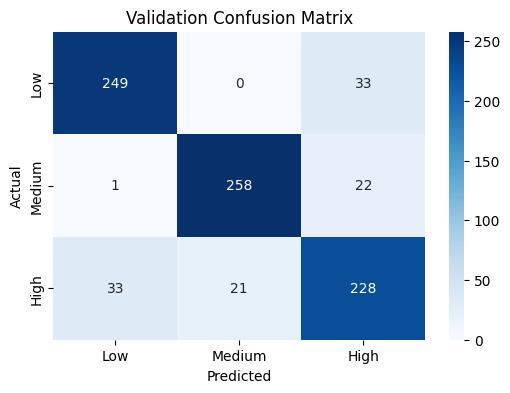

In [ ]:
# Plot validation confusion matrix
val_cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(val_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# === Test Evaluation ===
y_test_pred = clf.predict(X_test)
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
print(f"Test Macro F1 Score: {test_macro_f1:.4f}")


Test Classification Report:
               precision    recall  f1-score   support

        High       0.86      0.90      0.88       282
         Low       0.93      0.89      0.91       282
      Medium       0.79      0.78      0.79       281

    accuracy                           0.86       845
   macro avg       0.86      0.86      0.86       845
weighted avg       0.86      0.86      0.86       845

Test Macro F1 Score: 0.8568


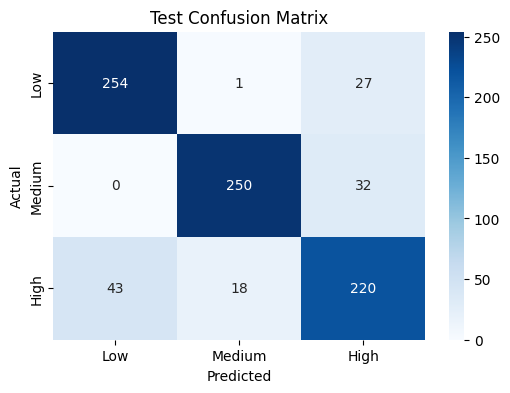

In [ ]:
# Plot test confusion matrix
test_cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()